### Imports

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from operators import dL, dR, dL_dag, dR_dag

### Symbolic Definitions

In [ ]:
epsL, epsR = sp.symbols('ϵ_L,ϵ_R') #Onsite energies
t, Delta = sp.symbols('t,Δ') #tunneling and pairing amplit
U = sp.symbols('U') #Coulomb interaction


def create_Hamiltonian():
    """Create the Hamiltonian for the system.
    H = H_onsite + H_tunnel + H_pairing + H_coulomb

    """
    H_onsite = epsL * dL_dag * dL + epsR * dR_dag * dR
    H_tunnel = t * (dL_dag * dR + dR_dag * dL)
    H_pairing = Delta * (dR * dL + dL_dag * dR_dag)
    H_coulomb = U * (dL_dag * dL) * (dR_dag * dR)

    H = H_onsite + H_tunnel + H_pairing + H_coulomb
    return H

H = create_Hamiltonian()
H_matrix = sp.Matrix(H)
eigenvals = H_matrix.eigenvals()
eigenvects = H_matrix.eigenvects()
print("Hamiltonian Matrix:")
sp.pprint(H_matrix)
print("\nEigenvalues:")
for val, mult in eigenvals.items():
    sp.pprint(val)
    print("Multiplicity:", mult)
print("\nEigenvectors:")
for val, mult, vects in eigenvects:
    print("Eigenvalue:")
    sp.pprint(val)
    print("Multiplicity:", mult)
    print("Eigenvectors:")
    for vect in vects:
        sp.pprint(vect)
    print()

SyntaxError: unexpected character after line continuation character (2439540918.py, line 5)

### Block Diagonal Hamiltonian

In [4]:

def block_diagonal_Hamiltonian():
    """Create the block diagonal Hamiltonian for the system."""
    S = epsL + epsR + U
    H_even = sp.Matrix([
        [0, Delta],
        [Delta, S]
    ])
    H_odd = sp.Matrix([
        [epsR, t],
        [t, epsL]
    ])
    return H_even, H_odd

H_even, H_odd = block_diagonal_Hamiltonian()
print("Block Diagonal Hamiltonian:")
print("Even Parity Sector:")
sp.pprint(H_even)
print("\nOdd Parity Sector:")
sp.pprint(H_odd)    

even_eigvals = H_even.eigenvals()
even_eigvects = H_even.eigenvects()
odd_eigvals = H_odd.eigenvals()
odd_eigvects = H_odd.eigenvects()


Block Diagonal Hamiltonian:
Even Parity Sector:
⎡0        Δ      ⎤
⎢                ⎥
⎣Δ  U + ϵ_L + ϵ_R⎦

Odd Parity Sector:
⎡ϵ_R   t ⎤
⎢        ⎥
⎣ t   ϵ_L⎦


In [5]:
## Find where E_even|_min = E_odd|_min
sp.pprint(even_eigvals)
sp.pprint(odd_eigvals)

⎧                   _________________________________________________________  ↪
⎪                  ╱  2                          2      2                  2   ↪
⎨U   ϵ_L   ϵ_R   ╲╱  U  + 2⋅U⋅ϵ_L + 2⋅U⋅ϵ_R + 4⋅Δ  + ϵ_L  + 2⋅ϵ_L⋅ϵ_R + ϵ_R    ↪
⎪─ + ─── + ─── - ────────────────────────────────────────────────────────────: ↪
⎩2    2     2                                 2                                ↪

↪                        _____________________________________________________ ↪
↪                       ╱  2                          2      2                 ↪
↪     U   ϵ_L   ϵ_R   ╲╱  U  + 2⋅U⋅ϵ_L + 2⋅U⋅ϵ_R + 4⋅Δ  + ϵ_L  + 2⋅ϵ_L⋅ϵ_R + ϵ ↪
↪  1, ─ + ─── + ─── + ──────────────────────────────────────────────────────── ↪
↪     2    2     2                                 2                           ↪

↪ ____   ⎫
↪   2    ⎪
↪ _R     ⎬
↪ ────: 1⎪
↪        ⎭
⎧               ________________________________                    __________ ↪
⎪              ╱    2      2                  2     

### Majorana like?

In [6]:
def H_matrix(epsL_val, epsR_val, t_val, Delta_val, U_val):
    H = create_Hamiltonian()
    H = H.subs({epsL:epsL_val, epsR:epsR_val, t:t_val, Delta:Delta_val, U:U_val})
    H_matrix = np.array(sp.Matrix(H).evalf(), dtype=complex)
    return H_matrix

def even_odd_Matrix(epsL_val, epsR_val, Delta_val, t_val, U_val):
    H_even, H_odd = block_diagonal_Hamiltonian()
    H_even = H_even.subs({epsL:epsL_val, epsR:epsR_val, Delta:Delta_val, U:U_val})
    H_odd = H_odd.subs({epsL:epsL_val, epsR:epsR_val, t:t_val, U:U_val})
    H_even = np.array(H_even.evalf(), dtype=complex)
    H_odd = np.array(H_odd.evalf(), dtype=complex)
    return H_even, H_odd



def Energy_degeneracy(even_eigvals, odd_eigvals):
    """Calculate the energy degeneracy δE.

    Args:
        Even eigenvalues (list): List of even eigenvalues.
        Odd eigenvalues (list): List of odd eigenvalues.
    """
    even_sorted = np.sort(even_eigvals)
    odd_sorted = np.sort(odd_eigvals)

    gs_even = even_sorted[0]
    gs_odd = odd_sorted[0]
    excited_even = even_sorted[1]
    excited_odd = odd_sorted[1]

    deltaE_gs = abs(gs_even - gs_odd)
    deltaE_es = abs(min(excited_even, excited_odd) - max(gs_even, gs_odd))
    if deltaE_es == 0:
        return 1
    return deltaE_gs / deltaE_es


def even_odd_density_matrices(gs_even, gs_odd):

    rho_even = np.outer(gs_even, np.conj(gs_even))
    rho_odd = np.outer(gs_odd, np.conj(gs_odd))

    return rho_even, rho_odd


def Local_distinguishability(rho_even, rho_odd):
    """Calculateth e local distinguishability LD
    
    Using the even and odd density matrices rho_even and rho_odd,
    we can calculate
    LD = 1/N ∑_j^N || ρ_j^o - ρ_j^e || = 1/N ∑_j^N ||δρ_j||

    Args:
        rho_even (np.array): Even density matrix.
        rho_odd (np.array): Odd density matrix.
    
    """
    N = rho_even.shape[0]
    LD = 1/N * np.sum(np.linalg.norm(rho_odd - rho_even, axis=1))
    return LD

def W_alpha(Odd_gs, Even_gs):
    """Calculate the Majorana wavefunction amplitudes W_alpha.

    Args:
        Odd_gs (np.array): Odd ground state.
        Even_gs (np.array): Even ground state.
    """
    # print(Odd_gs.shape, Even_gs.shape, dL.shape, dR.shape)
    WL = abs(np.vdot(Even_gs, (dL + dL_dag) @ Odd_gs))**2
    WR = abs(np.vdot(Even_gs, (dR + dR_dag) @ Odd_gs))**2
    # print(WL, WR)
    return WL, WR

def Z_alpha(Odd_gs, Even_gs):
    """Calculate the Majorana wavefunction amplitudes Z_alpha.

    Args:
        Odd_gs (np.array): Odd ground state.
        Even_gs (np.array): Even ground state.
    """
    ZL = abs(np.vdot(Even_gs, (dL - dL_dag) @ Odd_gs))**2
    ZR = abs(np.vdot(Even_gs, (dR - dR_dag) @ Odd_gs))**2
    return ZL, ZR


def Majorana_Polarization(Odd_gs, Even_gs):
    """Calculate the Majorana polarization.

    Args:
        Odd_gs (np.array): Odd ground state.
        Even_gs (np.array): Even ground state.
    """
    # print(Odd_gs.shape, Even_gs.shape)
    WL, WR = W_alpha(Odd_gs, Even_gs)
    ZL, ZR = Z_alpha(Odd_gs, Even_gs)


    ML = WL / (WL + ZL) if (WL + ZL) != 0 else 0
    MR = WR / (WR + ZR) if (WR + ZR) != 0 else 0

    return ML, MR



In [7]:
## Finding 4d states from the even and odd sectors

def find_4d_states(H_full, H_even, H_odd):
    """Find the 4d states from the full Hamiltonian and the even and odd sectors.

    Args:
        H_full (np.array): Full Hamiltonian.
        H_even (np.array): Even sector Hamiltonian.
        H_odd (np.array): Odd sector Hamiltonian.
    """
    eigvals_full, eigvecs_full = np.linalg.eigh(H_full)
    eigvals_even, eigvecs_even = np.linalg.eigh(H_even)
    eigvals_odd, eigvecs_odd = np.linalg.eigh(H_odd)

    E_gs_even = np.min(eigvals_even)
    E_gs_odd = np.min(eigvals_odd)

    if eigvals_full[0] == E_gs_even:
        Even_groundstate = eigvecs_full[:, 0]
        Odd_groundstate = eigvecs_full[:, 1]
        # print("Eigenvalue check:\n", eigvals_full[0],"=", E_gs_even,",  ", eigvals_full[1], "=", E_gs_odd)
    else:
        Even_groundstate = eigvecs_full[:, 1]
        Odd_groundstate = eigvecs_full[:, 0]
        # print("Eigenvalue check:\n", eigvals_full[1],"=", E_gs_even,",  ", eigvals_full[0], "=", E_gs_odd)
    return Even_groundstate, Odd_groundstate



In [8]:
### Interstate parameters
def interstate_params(U_inter, t):
    """Calculate the interstate parameters for the system.""" 
    U_inter = float(U_inter)
    t = float(t)
    epsL = -U_inter / 2
    epsR = -U_inter / 2
    Delta = t + U_inter / 2
    return epsL, epsR, Delta



U_inter = np.linspace(-5, 5, 100)
t_vals = np.linspace(0.1, 3, 5)

LD_vals = np.zeros((len(t_vals), len(U_inter)))
deltaE_vals = np.zeros((len(t_vals), len(U_inter)))
ML_vals = np.zeros((len(t_vals), len(U_inter)))
MR_vals = np.zeros((len(t_vals), len(U_inter)))


for i, t_val in enumerate(t_vals):
    for j, U_val in enumerate(U_inter):
        
        epsL_val, epsR_val, Delta_val = interstate_params(U_val, t_val)


        H_even, H_odd = even_odd_Matrix(epsL_val, epsR_val, Delta_val, t_val, U_val)
        even_eigvals, even_eigvects = np.linalg.eigh(H_even)
        odd_eigvals, odd_eigvects = np.linalg.eigh(H_odd)


        H_full = H_matrix(epsL_val, epsR_val, t_val, Delta_val, U_val)
        
        deltaE = Energy_degeneracy(even_eigvals, odd_eigvals)
        deltaE_vals[i, j] = deltaE

        gs_even = even_eigvects[:, 0]
        gs_odd = odd_eigvects[:, 0]

        rho_even, rho_odd = even_odd_density_matrices(gs_even, gs_odd)
        LD = Local_distinguishability(rho_even, rho_odd)
        LD_vals[i, j] = LD
        
        
    
        Even_gs_4d, Odd_gs_4d = find_4d_states(H_full, H_even, H_odd)
        ML, MR = Majorana_Polarization(Even_gs_4d, Odd_gs_4d)
        ML_vals[i, j] = ML
        MR_vals[i, j] = MR

### Plotting

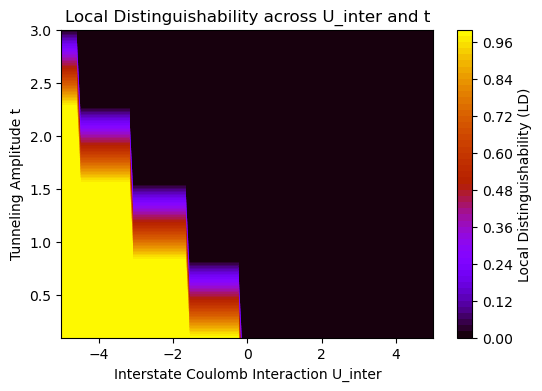

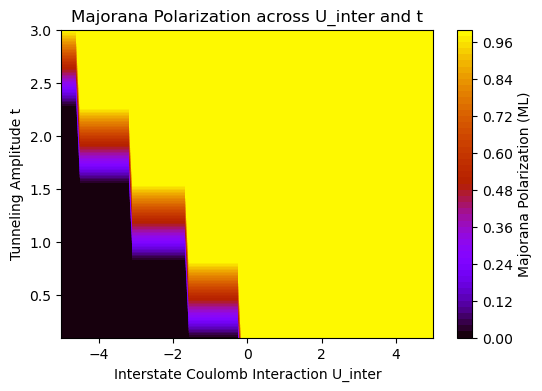

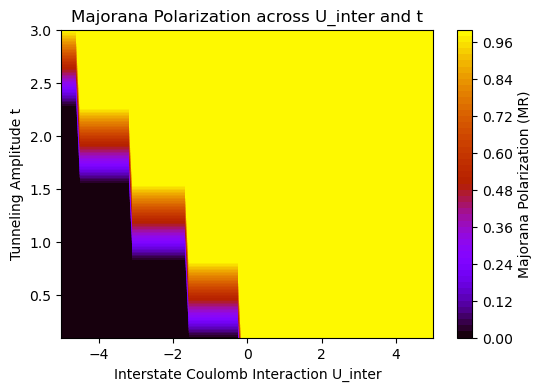

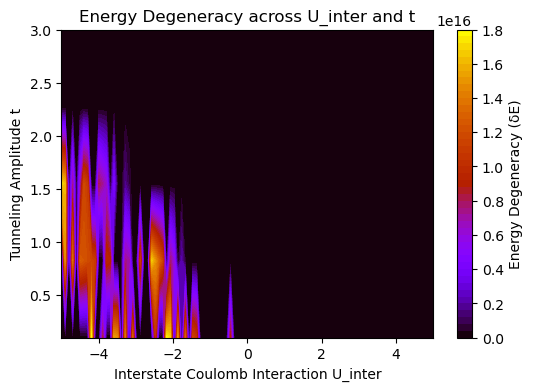

In [9]:

plt.figure(figsize=(6, 4))
plt.contourf(U_inter, t_vals, LD_vals, levels=50, cmap='gnuplot')
plt.colorbar(label='Local Distinguishability (LD)')
plt.xlabel('Interstate Coulomb Interaction U_inter')
plt.ylabel('Tunneling Amplitude t')
plt.title('Local Distinguishability across U_inter and t')
plt.show()

plt.figure(figsize=(6, 4))
plt.contourf(U_inter, t_vals, ML_vals, levels=50, cmap='gnuplot')
plt.colorbar(label='Majorana Polarization (ML)')
plt.xlabel('Interstate Coulomb Interaction U_inter')
plt.ylabel('Tunneling Amplitude t')
plt.title('Majorana Polarization across U_inter and t')
plt.show()

plt.figure(figsize=(6, 4))
plt.contourf(U_inter, t_vals, MR_vals, levels=50, cmap='gnuplot')
plt.colorbar(label='Majorana Polarization (MR)')
plt.xlabel('Interstate Coulomb Interaction U_inter')
plt.ylabel('Tunneling Amplitude t')
plt.title('Majorana Polarization across U_inter and t')
plt.show()

plt.figure(figsize=(6, 4))
plt.contourf(U_inter, t_vals, deltaE_vals, levels=50, cmap='gnuplot')
plt.colorbar(label='Energy Degeneracy (δE)')
plt.xlabel('Interstate Coulomb Interaction U_inter')
plt.ylabel('Tunneling Amplitude t')
plt.title('Energy Degeneracy across U_inter and t')
plt.show()  